# **ЗАДАНИЕ 13. ПРОЕКТ ПОСТРОЕНИЯ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ ДЛЯ РЕГРЕССИИ**

Обобщите полученные знания в ходе проекта построения простой модели машинного обучения для задачи классификации.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


***Методика выполнения задания:***

# **Раздел 1. Определение проблемы, загрузка библиотек и данных**

**1. Импортируйте следующие библиотеки:**

In [ ]:
import os
import numpy
import seaborn
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

**2. Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

**3. Загрузка данных о морских ушках.**

**Предсказание возраста морского ушка по физическим измерениям.**

Пол / номинальный / -- / M, F и I (младенец)

Длина / непрерывная / мм / Измерение длины корпуса

Диаметр / непрерывный / мм / перпендикулярный длине

Высота / непрерывная / мм / с мясом в оболочке

Весь вес / непрерывный / грамм / целое морское ушко

Очищенный вес / непрерывный / грамм / вес мяса

Вес внутренних органов / непрерывный / грамм / вес кишечника (после кровотечения)

Вес скорлупы / непрерывный / грамм / после сушки

Кольца / целое число / -- / +1.5 дает возраст в годах

In [ ]:
filename='abalone.data'
names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df=read_csv(filename,names=names)
df.sample(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4115,F,0.605,0.465,0.155,1.1000,0.547,0.2665,0.2585,10
1038,M,0.660,0.495,0.195,1.6275,0.594,0.3595,0.4850,10


In [ ]:
# заменяем пробельные символы на подчеркивания
df=df.rename(columns=lambda x: x.replace(' ','_'))

# **Раздел 2. Анализ данных**
**4. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**5. Посмотрите на размерность данных, обратившись к атрибуту shape.**

In [ ]:
df.shape

(4177, 9)

**6. Посмотрите на типы данных, обратившись к атрибуту dtypes.**

In [ ]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [ ]:
df["Sex"] = df["Sex"].astype('category').cat.codes # преобразуем 'object' в числовой столбец

In [ ]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
3548,0,0.495,0.370,0.120,0.594,0.2800,0.1100,0.1375,7
2413,0,0.505,0.380,0.145,0.651,0.2935,0.1900,0.1700,12
2537,1,0.660,0.525,0.215,1.786,0.6725,0.3615,0.4065,11


In [ ]:
df.dtypes

Sex                  int8
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

**7. Выведите на экран общую информацию о наборе данных с помощью функции info(). Прокомментируйте результат.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int8   
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), int8(1)
memory usage: 265.3 KB


**8. Установите точность вывода результатов до 3-х знаков после запятой с помощью функции set_option('precision', 3) из модуля pandas.**

In [ ]:
import pandas as pd
pd.set_option('precision', 3)

In [ ]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4016,0,0.640,0.525,0.175,1.382,0.646,0.311,0.370,9
1518,2,0.670,0.545,0.200,1.702,0.833,0.374,0.410,11
207,1,0.435,0.340,0.110,0.380,0.149,0.085,0.120,8
4141,0,0.650,0.505,0.165,1.357,0.573,0.281,0.430,11
825,1,0.395,0.290,0.095,0.319,0.138,0.080,0.082,7


**9. Выведите на экран описательные статистики, воспользовавшись функцией describe(). Прокомментируйте результат.**

In [ ]:
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4.177e+03,4177.000,4177.000
mean,1.053,0.524,0.408,0.140,0.829,0.359,1.806e-01,0.239,9.934
std,0.822,0.120,0.099,0.042,0.490,0.222,1.096e-01,0.139,3.224
min,0.000,0.075,0.055,0.000,0.002,0.001,5.000e-04,0.002,1.000
25%,0.000,0.450,0.350,0.115,0.442,0.186,9.350e-02,0.130,8.000
50%,1.000,0.545,0.425,0.140,0.799,0.336,1.710e-01,0.234,9.000
75%,2.000,0.615,0.480,0.165,1.153,0.502,2.530e-01,0.329,11.000
max,2.000,0.815,0.650,1.130,2.825,1.488,7.600e-01,1.005,29.000


**10.  Рассчитайте коэффициент корреляции Пирсона для каждой пары признаков (показателей), воспользуйтесь функцией corr(method='pearson'). Назовите пары показателей с наиболее сильной линейной связью.**

In [ ]:
df.corr(method='pearson')
# результативный признак средне коррелируется с остальными данными, факторные признаки отлично
# коррелируются между собой

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000,-0.036,-0.039,-0.042,-0.021,-0.001,-0.032,-0.035,-0.035
Length,-0.036,1.000,0.987,0.828,0.925,0.898,0.903,0.898,0.557
Diameter,-0.039,0.987,1.000,0.834,0.925,0.893,0.900,0.905,0.575
Height,-0.042,0.828,0.834,1.000,0.819,0.775,0.798,0.817,0.557
Whole_weight,-0.021,0.925,0.925,0.819,1.000,0.969,0.966,0.955,0.540
Shucked_weight,-0.001,0.898,0.893,0.775,0.969,1.000,0.932,0.883,0.421
Viscera_weight,-0.032,0.903,0.900,0.798,0.966,0.932,1.000,0.908,0.504
Shell_weight,-0.035,0.898,0.905,0.817,0.955,0.883,0.908,1.000,0.628
Rings,-0.035,0.557,0.575,0.557,0.540,0.421,0.504,0.628,1.000


**12. Постройте гистограмму для всех признаков, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

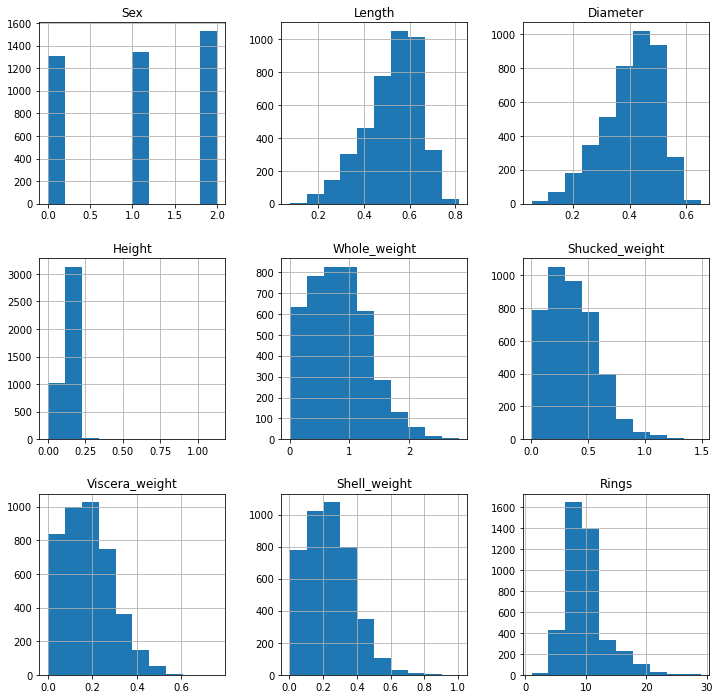

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,12))
plt.show()

In [ ]:
df.skew()

Sex              -0.098
Length           -0.640
Diameter         -0.609
Height            3.129
Whole_weight      0.531
Shucked_weight    0.719
Viscera_weight    0.592
Shell_weight      0.621
Rings             1.114
dtype: float64

In [ ]:
df.kurtosis()

Sex               -1.514
Length             0.065
Diameter          -0.045
Height            76.026
Whole_weight      -0.024
Shucked_weight     0.595
Viscera_weight     0.084
Shell_weight       0.532
Rings              2.331
dtype: float64

**резюме:**

Все признаки кроме признака 'Rings' имеют значительную асимметрию т.к. выходят за пределы стандартного отклонения, для 'Rings' асимметрия находится в пределах стандартного отклонения как и коэффициент эксцесса, т.е. можно считаль, что результирующий столбец 'Rings' распределен нормально.

In [ ]:
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4.177e+03,4177.000,4177.000
mean,1.053,0.524,0.408,0.140,0.829,0.359,1.806e-01,0.239,9.934
std,0.822,0.120,0.099,0.042,0.490,0.222,1.096e-01,0.139,3.224
min,0.000,0.075,0.055,0.000,0.002,0.001,5.000e-04,0.002,1.000
25%,0.000,0.450,0.350,0.115,0.442,0.186,9.350e-02,0.130,8.000
50%,1.000,0.545,0.425,0.140,0.799,0.336,1.710e-01,0.234,9.000
75%,2.000,0.615,0.480,0.165,1.153,0.502,2.530e-01,0.329,11.000
max,2.000,0.815,0.650,1.130,2.825,1.488,7.600e-01,1.005,29.000


**13. Постройте ядерную функцию плотности для всех признаков, воспользовавшись функцией plot(kind='density') и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

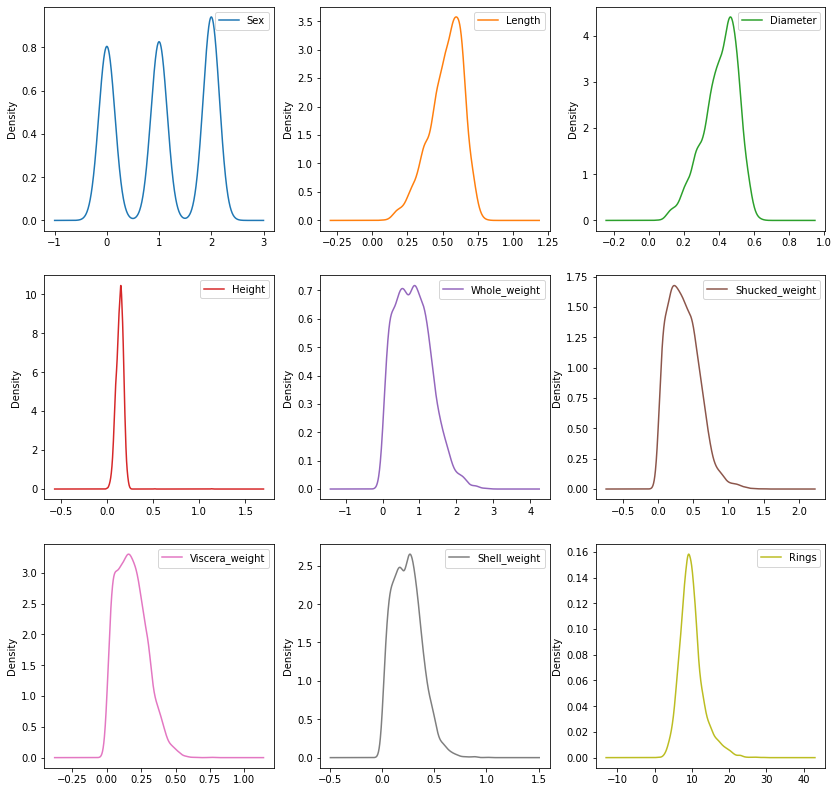

In [ ]:
df.plot(kind='density',subplots=True, layout=(3,3),sharex=False,figsize=(14,14))
plt.show()

**14. Постройте ящики с усами для всех признаков, воспользовавшись функцией plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

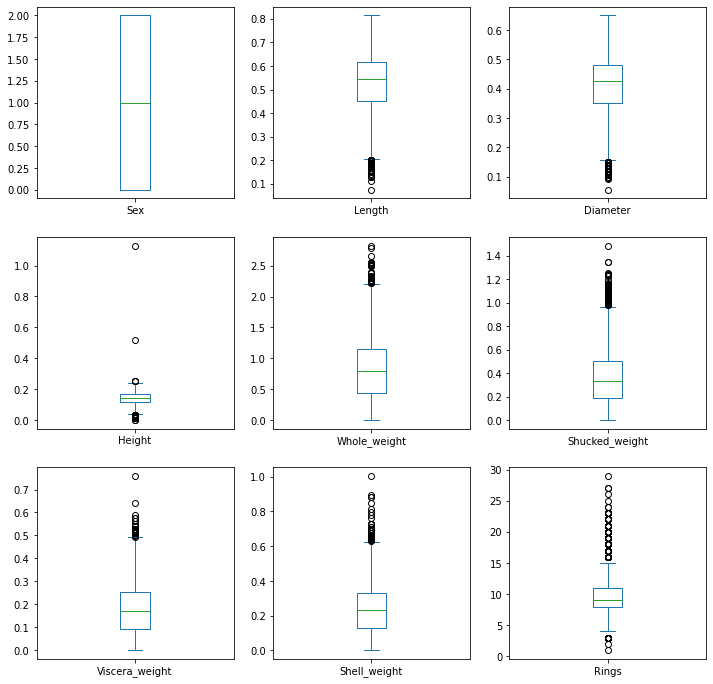

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

**15. Постройте диаграмму рассеяния, воспользовавшись функцией scatter_matrix() из модуля pandas.plotting и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

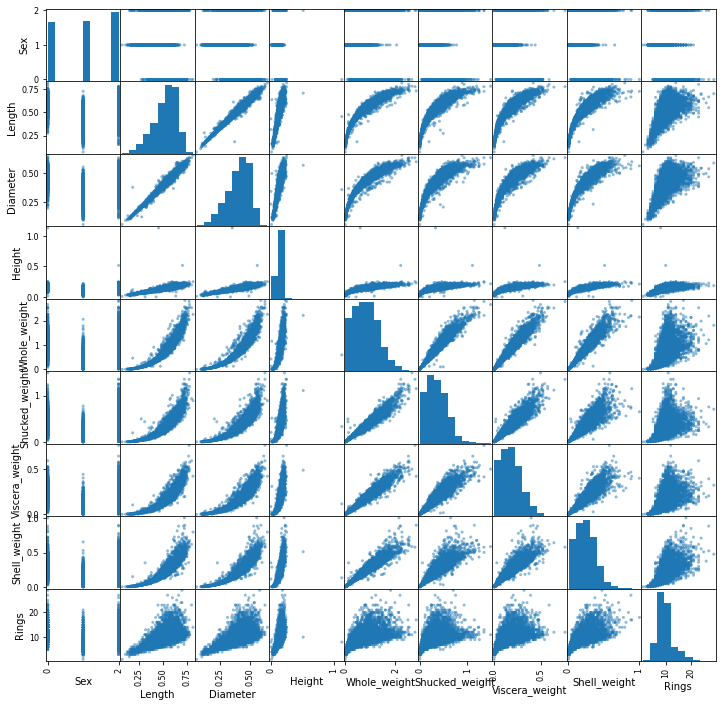

In [ ]:
scatter_matrix(df,figsize=(12,12))
plt.show()

**16.  Постройте коррелограмму в виде тепловой карты, воспользовавшись функцией figure() из модуля matplotlib.pyplot, функцией heatmap(data.corr(), annot = True) из модуля seaborn и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

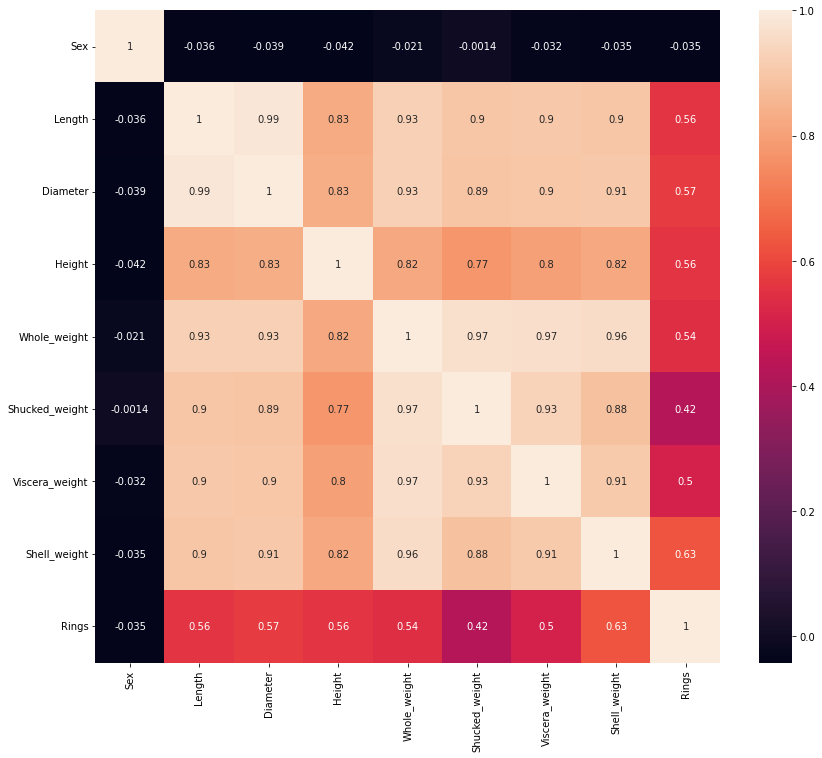

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot = True)
plt.show()

# **Раздел 3. Разбивка выборки на тестовую и обучающую**

**17. Сохраните в переменную array значения признаков, обратившись к атрибуту values.**

In [ ]:
# т.к. в последнем столбце указаны количество колец, каждое кольцо = 1.5 годам, нам нужно прогнозировать возраст
# для этого создаем результирующий столбец с переводом колец в года и зададим его как результирующий
df["year"] = df["Rings"]*1.5

In [ ]:
array = df.values
array

array([[ 2.   ,  0.455,  0.365, ...,  0.15 , 15.   , 22.5  ],
       [ 2.   ,  0.35 ,  0.265, ...,  0.07 ,  7.   , 10.5  ],
       [ 0.   ,  0.53 ,  0.42 , ...,  0.21 ,  9.   , 13.5  ],
       ...,
       [ 2.   ,  0.6  ,  0.475, ...,  0.308,  9.   , 13.5  ],
       [ 0.   ,  0.625,  0.485, ...,  0.296, 10.   , 15.   ],
       [ 2.   ,  0.71 ,  0.555, ...,  0.495, 12.   , 18.   ]])

**18. Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y. Прокомментируйте содержимое переменных X и Y.**

In [ ]:
df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,year
0,2,0.455,0.365,0.095,0.514,0.225,0.101,0.15,15,22.5
1,2,0.350,0.265,0.090,0.226,0.100,0.049,0.07,7,10.5


In [ ]:
X = array[:,:8]
Y = array[:,9]

In [ ]:
Y

array([22.5, 10.5, 13.5, ..., 13.5, 15. , 18. ])

**19. Разбейте выборку на обучающий и тестовый набор с помощью функции train_test_split() из модуля sklearn.model_selection. Пусть доля тестовой выборки - 0,2. Результат запишите в переменные X_train, X_test, Y_train, Y_test.**

In [ ]:
test_size = 0.2
seed = 7

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=test_size,random_state=seed)

# **Раздел 4. Выбор лучшей модели по исходным данным**

**20. Создайте пустой список и запишите его в переменную models.**

In [ ]:
models=[]

**21.  Добавьте в список models с помощью функции append() набор из кортежей, первый элемент которого содержит название модели, а второй – функцию для создания соответствующей модели. Включите все линейные и нелинейные модели для регрессии, рассмотренные в заданиях 10 и 11.**

In [ ]:
models.append(('LinRegr',LinearRegression())) # линейная регрессия

In [ ]:
models.append(('Ridge',Ridge())) # гребневая регрессия

In [ ]:
models.append(('Lasso',Lasso())) # лассо регрессия

In [ ]:
models.append(('ElasticNet',ElasticNet())) # стремится объединить лучшее из гребневой регрессии и регрессии лассо

In [ ]:
models.append(('KNN',KNeighborsRegressor())) # модель ближайшего соседа

In [ ]:
models.append(('DTree',DecisionTreeRegressor())) # модель решающего дерева

In [ ]:
models.append(('SVM',SVR())) # модель опорных векторов

**22. Выведите на экран список названий моделей с соответствующими значениями средней квадратичной оценки, взятой с отрицательным знаком, и стандартного отклонения, рассчитанными на кросс-валидации.**

***Раздел 5. Выбор лучшей модели по стандартизированным данным**

In [ ]:
models

[('LinRegr', LinearRegression()),
 ('Ridge', Ridge()),
 ('Lasso', Lasso()),
 ('ElasticNet', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('DTree', DecisionTreeRegressor()),
 ('SVM', SVR())]

In [ ]:
results =[]
names=[]

In [ ]:
scoring='neg_mean_squared_error'

In [ ]:
for name, model in models:
  kfold=KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name,cv_results.mean(),cv_results.std())

LinRegr -11.395044774918976 1.3730907358901387
Ridge -11.225939146078888 0.8978241090896703
Lasso -20.732595943886494 1.8297673126237766
ElasticNet -20.96088805957144 1.8152405022770481
KNN -11.284511927300267 1.1240986318740132
DTree -19.805305325117892 1.9514449070953857
SVM -12.321523138783864 1.411749892118526


**23. Изобразите результаты расчетов в виде ящика с усами.**

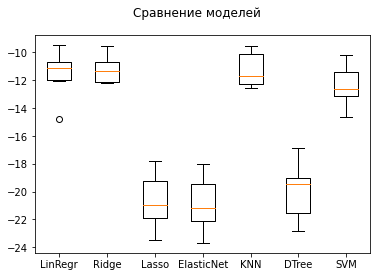

In [ ]:
fig=pyplot.figure()
fig.suptitle('Сравнение моделей')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**24. Выберите лучшую модель. Обоснуйте свой выбор.**

# **Раздел 5. Выбор лучшей модели по стандартизированным данным**

**25. Создайте пустой список в переменной pipelines.**

In [ ]:
pipelines=[]

**26. Добавьте в него кортеж, в котором содержится название стандартизированной модели и конвеер, в котором происходит стандартизация соответствующей модели. Проделайте это для всех моделей. Напомним, что программный конвеер создается с помощью функции Pipeline() из модуля sklearn.pipeline.**


In [ ]:
scaler=StandardScaler().fit(X) # стандартизуем факторные признаки
rescaledX=scaler.transform(X)

In [ ]:
rescaledX # просмотр стандартизованных факторных прихнаков

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [ ]:
results =[] # пустые списки для цикла
names=[]

In [ ]:
for name, model in models:
  kfold=KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results=cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name,cv_results.mean(),cv_results.std())

LinRegr -11.395044774918972 1.3730907358901254
Ridge -11.395977016680735 1.3795123270985232
Lasso -15.178528429668892 1.3632223955664133
ElasticNet -15.23278300810124 1.5549831800134073
KNN -11.849882637430724 1.2047890924424158
DTree -19.49263837733641 1.703171066225241
SVM -10.76909359509644 1.1871711997674954


**результаты без стандартизации:**

LinRegr -11.395044774918976 1.3730907358901387

Ridge -11.225939146078888 0.8978241090896703

Lasso -20.732595943886494 1.8297673126237766

ElasticNet -20.96088805957144 1.8152405022770481

KNN -11.284511927300267 1.1240986318740132

DTree -19.607611614058037 1.7917741389496964

SVM -12.321523138783864 1.411749892118526

In [ ]:
pipelines.append(('standardize',StandardScaler())) # функция выполняющая стандартизацию

In [ ]:
pipelines.append(('Ridge',Ridge()))

In [ ]:
# т.е. сначала стандартизируем данные обучающей выборки, потом обучит, затем стандартизирует данные на контрольной выборке,
# а потом проверит

In [ ]:
model=Pipeline(pipelines)

**27. Задайте разбиение на фолды с помощью функции KFold() из модуля sklearn.model_selection. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка, - пусть 10; 2) счетчик случайных чисел – пусть 7; 3) необходимость перемешивания данных выборки при каждой оценке, задав параметр shuffle=True.**

In [ ]:
kfold=KFold(n_splits = 10, random_state = 7, shuffle = True)

**28. Проведите кросс-валидацию, в ходе которой оцените среднюю величину средних квадратичных оценок, взятую с отрицательным знаком, и стандартное отклонение полученных оценок. Воспользуйтесь при этом функцией cross_val_score() из модуля sklearn.model_selection. На вход подайте созданный программный конвеер.**

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

**29. Выведите на экран полученный результат.**

In [ ]:
results.mean()

-11.396221906306762

In [ ]:
results.std()

1.3800281275310229

**30. Сделайте вывод о целесообразности создания программного**

In [ ]:
# модель ухудшилась

# **Раздел 6. Настройка параметра k в методе kNN**

**31. Стандартизируйте факторные признаки обучающего набора с помощью функций StandardScaler() из модуля sklearn.preprocessing, fit() и transform().**

In [ ]:
x = StandardScaler() # присваиваем переменную функции
x.fit_transform(X_train) # стандартизируем данные
#rescaledX_2 = x.transform(X_train) # заменяем нестандартизованные данные на стандартизованные

array([[-0.06266181,  0.20853113,  0.26347342, ..., -0.05977797,
        -0.21011127, -0.24460191],
       [-1.2798311 , -0.53864743, -0.79163838, ..., -0.68765273,
        -0.00946558, -0.82457039],
       [-0.06266181, -0.87072679, -0.99261206, ..., -1.06122696,
        -1.19053907, -1.08949426],
       ...,
       [-0.06266181, -2.03300454, -1.89699361, ..., -1.32903018,
        -1.43678605, -1.50478033],
       [ 1.15450748, -1.9499847 , -1.79650677, ..., -1.43255075,
        -1.42310567, -1.43317929],
       [-0.06266181, -1.61790534, -1.59553309, ..., -1.16699798,
        -1.29542204, -1.34725803]])

In [ ]:
x

StandardScaler()

**32. Создайте список возможных значений параметра k - пусть [1,3,5,7,9,11,13,15,17,19,21], воспользовавшись функцией array() из модуля numpy. На основе списка создайте словарь, воспользовавшись функцией dict().**

In [ ]:
import numpy as np
val_= np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid=dict(n_neigh=val_)
param_grid

{'n_neigh': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])}

**33. Создайте модель kNN, воспользовавшись функцией KNeighborsRegressor() из модуля sklearn.neighbors.**

In [ ]:
model=KNeighborsRegressor()

**34. Задайте разбиение на фолды с помощью функции KFold() из модуля sklearn.model_selection. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка, - пусть 10; 2) счетчик случайных чисел – пусть 7; 3) необходимость перемешивания данных выборки при каждой оценке, задав параметр shuffle=True.**

In [ ]:
kfold=KFold(n_splits= 10, random_state = 7, shuffle=True)
kfold

KFold(n_splits=10, random_state=7, shuffle=True)

**35.  Создайте модель поиска по сетке для параметра альфа, воспользовавшись функцией GridSearchCV() из модуля sklearn.model_selection. На вход функции подайте следующую информацию: 1) модель (estimator) – пусть kNN; 2) параметры для перебора (param_grid) – словарь параметров, созданный в п. 32; 3) количество фолдов для кросс-валидации (cv) – из п. 34.**

In [ ]:
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)

In [ ]:
scale = StandardScaler()

In [ ]:
rescaledX_2 = scale.fit_transform(X_train)

**36.  Обучите модель на переменных rescaledX и Y_train, воспользовавшись функцией fit().**

In [ ]:
grid.fit(rescaledX_2, Y_train)

**37. Выведите на экран последовательность следующих данных для каждого значения параметра k: 1) среднюю величину среднего квадратичного отклонения, взятую с отрицательным знаком, обратившись к параметру cv_results_['mean_test_score']; 2) стандартное отклонение, обратившись к параметру cv_results_['std_test_score']; 3) значение параметра k, обратившись к параметру cv_results_['params']. При этом можете воспользоваться циклом for и функцией zip() для совместного представления результатов расчетов.**

In [ ]:
lst_k = [1,3,5,7,9,11,13,15,17,19,21]

In [ ]:
results =[]
names=[]

цикл для поиска наилучшего параметра k:

In [ ]:
for i in lst_k:
  model=KNeighborsRegressor(n_neighbors=i)
  kfold=KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  print(i,cv_results.mean(),cv_results.std())

1 -18.13181344876252 1.49171277831914
3 -12.30031209482175 1.156143755570382
5 -11.284511927300267 1.1240986318740132
7 -10.894281994578147 1.2403391256566205
9 -10.862975233848008 1.2554584445936767
11 -10.801287600944592 1.2849101744510127
13 -10.768862861354414 1.2653715218806518
15 -10.712839603914954 1.266767697785445
17 -10.719818304559016 1.2540083407785734
19 -10.70780430460864 1.2683676460594557
21 -10.750765127571803 1.2604954033027287


# **Раздел 7. Ансамбли**

In [ ]:
import os
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import numpy
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pickle
import joblib

In [ ]:
import os
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

**38.  Создайте пустой список в переменной ensembles.**

**39.  Добавьте в него кортеж, в котором содержится название стандартизированной модели ансамбля и конвеер, в котором происходит стандартизация соответствующей модели. Проделайте это для следующих моделей: AdaBoost, GBM, Random Forest, Extra Trees. Напомним, что программный конвеер создается с помощью функции Pipeline() из модуля sklearn.pipeline.**

**40. Задайте разбиение на фолды с помощью функции KFold() из модуля sklearn.model_selection. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка, - пусть 10; 2) счетчик случайных чисел – пусть 7; 3) необходимость перемешивания данных выборки при каждой оценке, задав параметр shuffle=True.**

**41. Проведите кросс-валидацию, в ходе которой оцените среднюю величину средних квадратичных оценок, взятую с отрицательным знаком, и стандартное отклонение полученных оценок. Воспользуйтесь при этом функцией cross_val_score() из модуля sklearn.model_selection. На вход подайте созданный программный конвеер. Для охвата всех моделей удобно воспользоваться циклом for.**

**42. Выведите на экран полученный результат.**

In [ ]:
ensembles = []
ensembles

[]

In [ ]:
ensembles.append(('stsndardize',StandardScaler()))
ensembles

[('stsndardize', StandardScaler())]

In [ ]:
ensembles.append(('AdaBoost',AdaBoostRegressor(n_estimators = 30, random_state = 7)))
ensembles

[('stsndardize', StandardScaler()),
 ('AdaBoost', AdaBoostRegressor(n_estimators=30, random_state=7))]

In [ ]:
model = Pipeline(ensembles)
model

Pipeline(steps=[('stsndardize', StandardScaler()),
                ('AdaBoost',
                 AdaBoostRegressor(n_estimators=30, random_state=7))])

In [ ]:
kfold=KFold(n_splits= 10, random_state = 7, shuffle=True)

In [ ]:
results_AdaBoost=cross_val_score(model, X, Y, cv=kfold,scoring=scoring)

In [ ]:
results_AdaBoost.mean()

-17.124149333983322

In [ ]:
results_AdaBoost.std()

1.341530369683242

In [ ]:
ensembles.append(('Bagged Decision Trees',DecisionTreeClassifier(n_estimators = 100, random_state = 7)))

In [ ]:
ensembles.append(('GBM',GradientBoostingClassifier(n_estimators = 100, random_state = 7)))

In [ ]:
ensembles.append(('Random Forest',RandomForestClassifier(n_estimators = 100, max_features = 3)))

In [ ]:
ensembles.append(('Extra Trees',ExtraTreesClassifier(n_estimators = 100, max_features = 7)))

In [ ]:
ensembles.append(('XGBoost',XGBClassifier(n_estimators = 100,seed=7,max_depth=6, learning_rate = 0.3)))

**43. Выведите на экран результаты кросс-валидации в виде ящика с усами.**

**44. Сделайте вывод о лучшей модели ансамбля.**

**45. Настройте параметры лучшей модели ансамбля по аналогии с разделом 6. Прокомментируйте полученный результат.**

# **Раздел 8. Прогноз по лучшей модели**

**46. Стандартизируйте факторные признаки обучающего набора с помощью функций StandardScaler() из модуля sklearn.preprocessing, fit() и transform().**

**47. Создайте модель лучшего ансамбля, выявленную в п. 44.**

**48. Обучите ее на основе переменных rescaledX и Y_train.**

**49. Стандартизируйте факторные признаки тестового набора с помощью функций StandardScaler() из модуля sklearn.preprocessing, fit() и transform().**

**50. Воспользуйтесь ими для нахождения расчетных значений по модели ансамбля, воспользовавшись функцией predict().**

**51. Выведите на экран среднюю квадратичную ошибку на тестовом наборе, воспользовавшись функцией mean_squared_error() из модуля sklearn.metrics. На вход функции подайте фактическое и расчетное значение результативного признака на тестовом наборе. Прокомментируйте результат.**

In [ ]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)

In [ ]:
rescaledX

array([[-0.06266181,  0.20853113,  0.26347342, ..., -0.05977797,
        -0.21011127, -0.24460191],
       [-1.2798311 , -0.53864743, -0.79163838, ..., -0.68765273,
        -0.00946558, -0.82457039],
       [-0.06266181, -0.87072679, -0.99261206, ..., -1.06122696,
        -1.19053907, -1.08949426],
       ...,
       [-0.06266181, -2.03300454, -1.89699361, ..., -1.32903018,
        -1.43678605, -1.50478033],
       [ 1.15450748, -1.9499847 , -1.79650677, ..., -1.43255075,
        -1.42310567, -1.43317929],
       [-0.06266181, -1.61790534, -1.59553309, ..., -1.16699798,
        -1.29542204, -1.34725803]])

In [ ]:
model=ExtraTreesClassifier(n_estimators = 100, max_features = 7)

In [ ]:
kfold=KFold(n_splits= 10, random_state = 7, shuffle=True)

In [ ]:
results=cross_val_score(model, rescaledX, Y_train, cv=kfold)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 734, in _validate_y_class_weight
    check_classification_targets(y)
  File "/usr

In [ ]:
results.mean()

In [ ]:
results.std()